In [41]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
data=pd.read_csv("PricePredictionData.csv",names=["HostelName","No_of_Bed","Ac","Laundry","FoodType","Rating","Security","price"
])

X=data[["No_of_Bed","Ac","Laundry","FoodType","Rating","Security"
]]
y=data.price




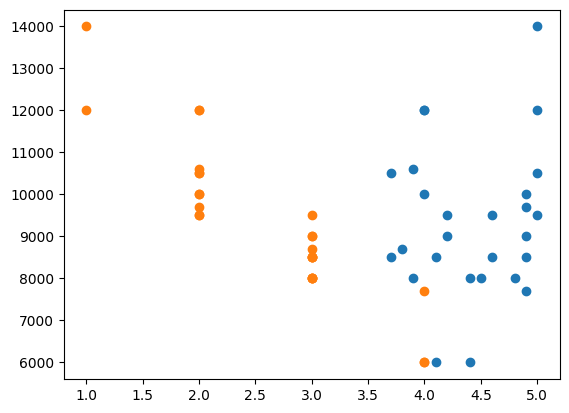

In [42]:
import matplotlib.pyplot as plt
plt.scatter(data["Rating"],data["price"])
plt.scatter(data["No_of_Bed"],data["price"])
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.4,random_state=10)


In [44]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,Y_train) 
lr_clf.score(X_test,Y_test)


0.3496892611833847

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=4,test_size=0.4,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([-0.18148559,  0.49161004,  0.82457684,  0.70439359])

In [46]:
def predict_price(No_of_Bed,Ac,Security,FoodType,Rating,Laundry):
    x=np.zeros(len(X.columns))
    x[0]=No_of_Bed
    x[1]=Ac
    x[2]=Security
    x[3]=FoodType
    x[4]=Rating
    x[5]=Laundry

    
    return lr_clf.predict([x])[0]

In [47]:
predict_price(1,1,1,0,4,1)

C:\Users\lahar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13575.000754990491

In [48]:
from joblib import dump
dump(lr_clf,"./../savedmodels/model.joblib")


['./../savedmodels/model.joblib']